<h1>capstone project</h1>

First of all, import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

Second, Import data

In [2]:
link = "jp_postal_codes.csv"
df = pd.read_csv(link)
df.head()

postalcode  Neighborhood      state     Borough  Latitude  Longitude
0   490-1401     Rokujocho  Aichi Ken  Yatomi Shi      34.9     137.15
1   490-1402      Gotoyama  Aichi Ken  Yatomi Shi      34.9     137.15
2   490-1403  Toriganjicho  Aichi Ken  Yatomi Shi      34.9     137.15
3   490-1403     Toriganji  Aichi Ken  Yatomi Shi      34.9     137.15
4   490-1404       Ikadaba  Aichi Ken  Yatomi Shi      34.9     137.15

In [3]:
df.shape

(123695, 6)

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [5]:
latitude = 35.6804
longitude = 139.7690

In [6]:
df_tokyo = df[df["state"] == "Tokyo To"]
df_tokyo.shape

(3809, 6)

In [7]:
df_tokyo2 = df_tokyo.drop_duplicates(subset = "Longitude")
df_tokyo3 = df_tokyo.drop_duplicates(subset = "Latitude")
df_tokyo3.shape

(895, 6)

In [8]:
df_tokyo4 = df_tokyo3[df_tokyo3["Borough"].str.contains("Ku")]
df_tokyo4.head()

postalcode          Neighborhood     state    Borough  Latitude  \
108164   130-0000  Ikanikeisaiganaibaai  Tokyo To  Sumida Ku   35.7068   
108165   130-0001            Azumabashi  Tokyo To  Sumida Ku   35.7096   
108166   130-0002              Narihira  Tokyo To  Sumida Ku   35.7079   
108167   130-0003              Yokokawa  Tokyo To  Sumida Ku   35.7048   
108168   130-0004                 Honjo  Tokyo To  Sumida Ku   35.7047   

        Longitude  
108164   139.8072  
108165   139.8031  
108166   139.8134  
108167   139.8156  
108168   139.8021

In [9]:
df_tokyo4.shape

(651, 6)

In [10]:
# create map of Toronto using latitude and longitude values
map_tokyo = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_tokyo4['Latitude'], df_tokyo4['Longitude'], df_tokyo4['Borough'], df_tokyo4['Neighborhood']):
    label = '{}, {}'.format(borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tokyo)  

In [11]:
display(map_tokyo)

In [12]:
CLIENT_ID = 'KSOAWC4JOZ03AERBC5O24EHXP1VGECOJPYCPPXL1ZMPNGPAP' # your Foursquare ID
CLIENT_SECRET = 'AUEW45OKERMNLPB2YW4CKUJKMASLS0XHZRXKQ45MN3IUUD2P' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KSOAWC4JOZ03AERBC5O24EHXP1VGECOJPYCPPXL1ZMPNGPAP
CLIENT_SECRET:AUEW45OKERMNLPB2YW4CKUJKMASLS0XHZRXKQ45MN3IUUD2P


In [13]:
df_tokyo4.reset_index()

index postalcode                         Neighborhood     state  \
0    108164   130-0000                 Ikanikeisaiganaibaai  Tokyo To   
1    108165   130-0001                           Azumabashi  Tokyo To   
2    108166   130-0002                             Narihira  Tokyo To   
3    108167   130-0003                             Yokokawa  Tokyo To   
4    108168   130-0004                                Honjo  Tokyo To   
5    108170   130-0011                             Ishiwara  Tokyo To   
6    108171   130-0012                               Taihei  Tokyo To   
7    108172   130-0013                               Kinshi  Tokyo To   
8    108173   130-0014                             Kamezawa  Tokyo To   
9    108174   130-0015                              Yokoami  Tokyo To   
10   108175   130-0021                               Midori  Tokyo To   
11   108176   130-0022                            Kotobashi  Tokyo To   
12   108177   130-0023                             Tatekawa  Tokyo To   
13   108178   130-0024                             Kikukawa  Tokyo To   
14   108179   130-0025                              Chitose  Tokyo To   
15   108180   130-0026                              Ryogoku  Tokyo To   
16   108181   131-0031                               Sumida  Tokyo To   
17   108182   131-0032                      Higashimukojima  Tokyo To   
18   108183   131-0033                             Mukojima  Tokyo To   
19   108184   131-0034                         Tsutsumidori  Tokyo To   
20   108185   131-0041                               Yahiro  Tokyo To   
21   108186   131-0042                        Higashisumida  Tokyo To   
22   108187   131-0043                            Tachibana  Tokyo To   
23   108188   131-0044                                Bunka  Tokyo To   
24   108189   131-0045                              Oshiage  Tokyo To   
25   108190   131-0046                              Kyojima  Tokyo To   
26   108191   166-0000                 Ikanikeisaiganaibaai  Tokyo To   
27   108192   166-0001                          Asagayakita  Tokyo To   
28   108193   166-0002                           Koenjikita  Tokyo To   
29   108194   166-0003                         Koenjiminami  Tokyo To   
30   108195   166-0004                        Asagayaminami  Tokyo To   
31   108196   166-0011                              Umezato  Tokyo To   
32   108198   166-0013                            Horinochi  Tokyo To   
33   108199   166-0014                            Matsunoki  Tokyo To   
34   108200   166-0015                        Naritahigashi  Tokyo To   
35   108201   166-0016                          Naritanishi  Tokyo To   
36   108202   167-0021                                Igusa  Tokyo To   
37   108203   167-0022                           Shimoigusa  Tokyo To   
38   108204   167-0023                            Kamiigusa  Tokyo To   
39   108205   167-0031                           Honamanuma  Tokyo To   
40   108206   167-0032                              Amanuma  Tokyo To   
41   108207   167-0033                              Shimizu  Tokyo To   
42   108208   167-0034                                Momoi  Tokyo To   
43   108209   167-0035                              Imagawa  Tokyo To   
44   108212   167-0043                              Kamiogi  Tokyo To   
45   108213   167-0051                              Ogikubo  Tokyo To   
46   108214   167-0052                        Minamiogikubo  Tokyo To   
47   108215   167-0053                       Nishiogiminami  Tokyo To   
48   108216   167-0054                                Shoan  Tokyo To   
49   108217   168-0061                                Omiya  Tokyo To   
50   108218   168-0062                                Honan  Tokyo To   
51   108219   168-0063                                Izumi  Tokyo To   
52   108220   168-0064                               Eifuku  Tokyo To   
53   108221   168-0065                           Hamadayama  Tok

In [14]:
df_tokyo4.iloc[0,3]

'Sumida Ku'

In [15]:
neighborhood_latitude = df_tokyo4.iloc[0, 4] # neighborhood latitude value
neighborhood_longitude = df_tokyo4.iloc[0, 5] # neighborhood longitude value

neighborhood_name = df_tokyo4.iloc[0, 1] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Ikanikeisaiganaibaai are 35.7068, 139.8072.


In [16]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KSOAWC4JOZ03AERBC5O24EHXP1VGECOJPYCPPXL1ZMPNGPAP&client_secret=AUEW45OKERMNLPB2YW4CKUJKMASLS0XHZRXKQ45MN3IUUD2P&v=20180605&ll=35.7068,139.8072&radius=500&limit=100'

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1d70299df0a936ea46678a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Higashikomagata',
  'headerFullLocation': 'Higashikomagata, Tokyo',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 34,
  'suggestedBounds': {'ne': {'lat': 35.7113000045, 'lng': 139.8127314329682},
   'sw': {'lat': 35.7022999955, 'lng': 139.80166856703178}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dc8d9fbb0fbf26798be503f',
       'name': '野口鮮魚店',
       'location': {'address': '東駒形4-6-9',
        'lat': 35.70651461315901,
        'lng': 139.80577361148406,
        'labeledLatLngs': [{'label': 'display',
          'lat': 35.70651461315901,
      

In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name           categories        lat  \
0                              野口鮮魚店   Seafood Restaurant  35.706515   
1  Tobacco & Salt Museum (たばこと塩の博物館)               Museum  35.705897   
2                              割烹 船生  Japanese Restaurant  35.706543   
3         Unlimited Coffee Bar Tokyo          Coffee Shop  35.708950   
4          Ikinari Steak (いきなり!ステーキ)           Steakhouse  35.708884   

          lng  
0  139.805774  
1  139.808494  
2  139.804295  
3  139.808599  
4  139.806446

In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

34 venues were returned by Foursquare.


In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
tokyo_venues = getNearbyVenues(names=df_tokyo4['Neighborhood'],
                                   latitudes=df_tokyo4['Latitude'],
                                   longitudes=df_tokyo4['Longitude']
                                  )

Ikanikeisaiganaibaai
Azumabashi
Narihira
Yokokawa
Honjo
Ishiwara
Taihei
Kinshi
Kamezawa
Yokoami
Midori
Kotobashi
Tatekawa
Kikukawa
Chitose
Ryogoku
Sumida
Higashimukojima
Mukojima
Tsutsumidori
Yahiro
Higashisumida
Tachibana
Bunka
Oshiage
Kyojima
Ikanikeisaiganaibaai
Asagayakita
Koenjikita
Koenjiminami
Asagayaminami
Umezato
Horinochi
Matsunoki
Naritahigashi
Naritanishi
Igusa
Shimoigusa
Kamiigusa
Honamanuma
Amanuma
Shimizu
Momoi
Imagawa
Kamiogi
Ogikubo
Minamiogikubo
Nishiogiminami
Shoan
Omiya
Honan
Izumi
Eifuku
Hamadayama
Takaidohigashi
Shimotakaido
Kamitakaido
Miyamae
Kugayama
Ikanikeisaiganaibaai
Honshiocho
Yotsuya
Aizumicho
Saneicho
Wakaba
Minamimotomachi
Daikyocho
Shinanomachi
Samoncho
Kabukicho
Nishishinjuku Sumitomofudosan Shinj
Nishiochiai
Nakaochiai
Shimochiai
Nakai
Wasedamachi
Waseda Minamicho
Kikuicho
Babashitacho
Nishiwaseda(2-Chome1-Ban1-23-Go.2-B
Haramachi
Yochomachi
Wakamatsucho
Sumiyoshicho
Tomihisacho
Yamabukicho
Enokicho
Suidocho
Nishigokencho
Higashigokencho
Shiroganecho

In [23]:
print(tokyo_venues.shape)
tokyo_venues.head()

(25555, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Ikanikeisaiganaibaai                35.7068                139.8072   
1  Ikanikeisaiganaibaai                35.7068                139.8072   
2  Ikanikeisaiganaibaai                35.7068                139.8072   
3  Ikanikeisaiganaibaai                35.7068                139.8072   
4  Ikanikeisaiganaibaai                35.7068                139.8072   

                               Venue  Venue Latitude  Venue Longitude  \
0                              野口鮮魚店       35.706515       139.805774   
1  Tobacco & Salt Museum (たばこと塩の博物館)       35.705897       139.808494   
2                              割烹 船生       35.706543       139.804295   
3         Unlimited Coffee Bar Tokyo       35.708950       139.808599   
4          Ikinari Steak (いきなり!ステーキ)       35.708884       139.806446   

        Venue Category  
0   Seafood Restaurant  
1               Museum  
2  Japanese Restaurant  
3          Coffee Shop  
4           Steakhouse

In [24]:
tokyo_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                 
Adachi                                                  21   
Agebacho                                               100   
Aioicho                                                 32   
Aizumicho                                               81   
Akabane                                                100   
Akabanedai                                               6   
Akabanekita                                             28   
Akabaneminami                                           95   
Akabanenishi                                             8   
Akashicho                                               48   
Akatsutsumi                                             14   
Amanuma                                                 32   
Aobadai                                                 61   
Aoto                                                    47   
Arai                                                    69   
Arakawa                                                 36   
Ariake                                                  56   
Asagayakita                                             18   
Asagayaminami                                           57   
Asahicho                                                 3   
Asahigaoka                                              38   
Asakusabashi                                            61   
Azabumamianacho                                        100   
Azumabashi                                              76   
Azusawa                                                 48   
Babashitacho                                            55   
Botan                                                  100   
Bunka                                                   29   
Chidori                                                 38   
Chihaya                                                 24   
Chitose                                                 66   
Chitosedai                                              26   
Chuo                                                    14   
Chuocho                                                 51   
Chuohoncho(3-5-Chome)                                   26   
Daiba                                                  100   
Daikanyamacho                                          100   
Daikyocho                                               40   
Daizawa                                                 75   
Denenchofu                                              20   
Denenchofu Honcho                                       27   
Denenchofu Minami                                       17   
Dogenzaka                                              100   
Doshida                                                 11   
Ebara                                                   32   
Ebisu Ebisugadempureisu(1-Kai)                         100   
Ebisuminami                                            100   
Ebisunishi                                             100   
Edagawa                                                 24   
Egota                                                    8   
Eharacho                                                27   
Eifuku                                                  22   
Eitai                                                   55   
Enokicho                                                63   
Etchujima                                               28   
Fujimicho                                               10   
Fujimidai                                                9   
Fukasawa                                                12   
Fukuzumi                                                68   
Funado                                                   8   
Furuishiba                                              56   
Futaba                                                  34   
Futabacho                                               29   
Gohongi

In [25]:
print('There are {} uniques categories.'.format(len(tokyo_venues['Venue Category'].unique())))

There are 421 uniques categories.


In [26]:
# one hot encoding
tokyo_onehot = pd.get_dummies(tokyo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tokyo_onehot['Neighborhood'] = tokyo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tokyo_onehot.columns[-1]] + list(tokyo_onehot.columns[:-1])
tokyo_onehot = tokyo_onehot[fixed_columns]

tokyo_onehot.head()

Zoo Exhibit  ATM  Acai House  Accessories Store  Adult Boutique  \
0            0    0           0                  0               0   
1            0    0           0                  0               0   
2            0    0           0                  0               0   
3            0    0           0                  0               0   
4            0    0           0                  0               0   

   African Restaurant  American Restaurant  Amphitheater  Antique Shop  \
0                   0                    0             0             0   
1                   0                    0             0             0   
2                   0                    0             0             0   
3                   0                    0             0             0   
4                   0                    0             0             0   

   Aquarium  Arcade  Argentinian Restaurant  Art Gallery  Art Museum  \
0         0       0                       0            0           0   
1         0       0                       0            0           0   
2         0       0                       0            0           0   
3         0       0                       0            0           0   
4         0       0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Australian Restaurant  Auto Garage  Auto Workshop  \
0                   0                      0            0              0   
1                   0                      0            0              0   
2                   0                      0            0              0   
3                   0                      0            0              0   
4                   0                      0            0              0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0                0          0           0           0       0   
1                0          0           0           0       0   
2                0          0           0           0       0   
3                0          0           0           0       0   
4                0          0           0           0       0   

   Bangladeshi Restaurant  Bank  Bar  Baseball Field  Baseball Stadium  \
0                       0     0    0               0                 0   
1                       0     0    0               0                 0   
2                       0     0    0               0                 0   
3                       0     0    0               0                 0   
4                       0     0    0               0                 0   

   Basketball Court  Bath House  Beach  Bed & Breakfast  Beer Bar  \
0                 0           0      0                0         0   
1                 0           0      0                0         0   
2                 0           0      0                0         0   
3                 0           0      0                0         0   
4                 0           0      0                0         0   

   Beer Garden  Beer Store  Belarusian Restaurant  Belgian Restaurant  \
0            0           0                      0                   0   
1            0           0                      0                   0   
2            0           0                      0                   0   
3            0           0                      0                   0   
4            0           0                      0                   0   

   Betting Shop  Big Box Store  Bike Rental / Bike Share  Bike Shop  \
0             0              0                         0          0   
1             0   

In [27]:
tokyo_onehot.shape

(25555, 421)

In [28]:
tokyo_grouped = tokyo_onehot.groupby('Neighborhood').mean().reset_index()
tokyo_grouped.head()

Neighborhood  Zoo Exhibit       ATM  Acai House  Accessories Store  \
0       Adachi          0.0  0.000000         0.0                0.0   
1     Agebacho          0.0  0.000000         0.0                0.0   
2      Aioicho          0.0  0.000000         0.0                0.0   
3    Aizumicho          0.0  0.012346         0.0                0.0   
4      Akabane          0.0  0.000000         0.0                0.0   

   Adult Boutique  African Restaurant  American Restaurant  Amphitheater  \
0             0.0                 0.0                  0.0           0.0   
1             0.0                 0.0                  0.0           0.0   
2             0.0                 0.0                  0.0           0.0   
3             0.0                 0.0                  0.0           0.0   
4             0.0                 0.0                  0.0           0.0   

   Antique Shop  Aquarium  Arcade  Argentinian Restaurant  Art Gallery  \
0           0.0       0.0    0.00                     0.0     0.000000   
1           0.0       0.0    0.00                     0.0     0.000000   
2           0.0       0.0    0.00                     0.0     0.000000   
3           0.0       0.0    0.00                     0.0     0.012346   
4           0.0       0.0    0.01                     0.0     0.000000   

   Art Museum  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0    0.000000                  0.0                   0.0              0.00   
1    0.000000                  0.0                   0.0              0.01   
2    0.000000                  0.0                   0.0              0.00   
3    0.012346                  0.0                   0.0              0.00   
4    0.000000                  0.0                   0.0              0.00   

   Athletics & Sports  Australian Restaurant  Auto Garage  Auto Workshop  \
0                 0.0                    0.0      0.00000            0.0   
1                 0.0                    0.0      0.00000            0.0   
2                 0.0                    0.0      0.03125            0.0   
3                 0.0                    0.0      0.00000            0.0   
4                 0.0                    0.0      0.00000            0.0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop    Bakery  \
0              0.0   0.000000         0.0         0.0  0.000000   
1              0.0   0.070000         0.0         0.0  0.010000   
2              0.0   0.062500         0.0         0.0  0.000000   
3              0.0   0.061728         0.0         0.0  0.012346   
4              0.0   0.050000         0.0         0.0  0.010000   

   Bangladeshi Restaurant  Bank       Bar  Baseball Field  Baseball Stadium  \
0                     0.0   0.0  0.000000             0.0               0.0   
1                     0.0   0.0  0.020000             0.0               0.0   
2                     0.0   0.0  0.000000             0.0               0.0   
3                     0.0   0.0  0.037037             0.0               0.0   
4                     0.0   0.0  0.010000             0.0               0.0   

   Basketball Court  Bath House  Beach  Bed & Breakfast  Beer Bar  \
0               0.0         0.0    0.0         0.000000  0.000000   
1               0.0         0.0    0.0         0.000000  0.000000   
2               0.0         0.0    0.0         0.000000  0.000000   
3               0.0         0.0    0.0         0.012346  0.012346   
4               0.0         0.0    0.0         0.000000  0.010000   

   Beer Garden  Beer Store  Belarusian Restaurant  Belgian Restaurant  \
0          0.0         0.0                    0.0                 0.0   
1          0.0         0.0                    0.0                 0.0   
2          0.0         0.0                    0.0                 0.0   
3          0.0         0.0                    0.0                 0.0   
4          0.0         0.0                    0.0                 0.0   

   Bettin

In [29]:
tokyo_grouped.shape

(619, 421)

In [30]:
num_top_venues = 5

for hood in tokyo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = tokyo_grouped[tokyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adachi----
                venue  freq
0   Convenience Store  0.24
1  Donburi Restaurant  0.10
2        Intersection  0.10
3      Ice Cream Shop  0.05
4    Ramen Restaurant  0.05


----Agebacho----
                 venue  freq
0  Japanese Restaurant  0.14
1   Italian Restaurant  0.12
2            BBQ Joint  0.07
3             Sake Bar  0.05
4    French Restaurant  0.05


----Aioicho----
               venue  freq
0  Convenience Store  0.28
1       Intersection  0.12
2        Bus Station  0.06
3           Bus Stop  0.06
4          BBQ Joint  0.06


----Aizumicho----
               venue  freq
0           Sake Bar  0.15
1  Convenience Store  0.10
2   Ramen Restaurant  0.10
3          BBQ Joint  0.06
4               Café  0.05


----Akabane----
               venue  freq
0           Sake Bar  0.16
1  Convenience Store  0.09
2   Ramen Restaurant  0.08
3          BBQ Joint  0.05
4        Coffee Shop  0.03


----Akabanedai----
                venue  freq
0     Soba Restaurant  0.17
1    

               venue  freq
0  Convenience Store  0.12
1       Intersection  0.12
2               Park  0.08
3           Bus Stop  0.08
4          BBQ Joint  0.08


----Egota----
                           venue  freq
0              Convenience Store  0.75
1               Ramen Restaurant  0.12
2                           Park  0.12
3                    Zoo Exhibit  0.00
4  Paper / Office Supplies Store  0.00


----Eharacho----
                venue  freq
0   Convenience Store  0.15
1        Intersection  0.07
2       Grocery Store  0.07
3            Bus Stop  0.07
4  Chinese Restaurant  0.07


----Eifuku----
            venue  freq
0            Park  0.14
1  Baseball Field  0.09
2            Tree  0.09
3    Intersection  0.09
4            Pool  0.05


----Eitai----
               venue  freq
0  Convenience Store  0.22
1          BBQ Joint  0.09
2           Sake Bar  0.07
3         Steakhouse  0.05
4   Ramen Restaurant  0.04


----Enokicho----
                venue  freq
0   Convenience

                 venue  freq
0    Convenience Store  0.18
1             Sake Bar  0.11
2  Tonkatsu Restaurant  0.05
3          Supermarket  0.05
4       Discount Store  0.05


----Higashikamata----
               venue  freq
0  Convenience Store  0.41
1      Grocery Store  0.09
2          Drugstore  0.09
3      Auto Workshop  0.05
4        Coffee Shop  0.05


----Higashikanamachi----
                venue  freq
0   Convenience Store  0.25
1        Intersection  0.25
2         Pizza Place  0.08
3  Chinese Restaurant  0.08
4       Deli / Bodega  0.08


----Higashikanda----
                 venue  freq
0             Sake Bar  0.18
1     Ramen Restaurant  0.08
2                 Café  0.04
3      Soba Restaurant  0.04
4  Tonkatsu Restaurant  0.03


----Higashikasai----
               venue  freq
0  Convenience Store  0.45
1   Ramen Restaurant  0.20
2   Sushi Restaurant  0.10
3       Intersection  0.05
4           Pharmacy  0.05


----Higashikojiya----
                    venue  freq
0      

                venue  freq
0   Convenience Store  0.29
1  Italian Restaurant  0.10
2               River  0.05
3      Ice Cream Shop  0.05
4          Steakhouse  0.05


----Honisshiki----
                    venue  freq
0             Supermarket  0.21
1       Convenience Store  0.16
2            Intersection  0.05
3          Breakfast Spot  0.05
4  Furniture / Home Store  0.05


----Honjo----
               venue  freq
0  Convenience Store  0.22
1           Sake Bar  0.07
2      Grocery Store  0.07
3        Coffee Shop  0.07
4          BBQ Joint  0.04


----Honkomagome----
                 venue  freq
0    Convenience Store  0.18
1          Coffee Shop  0.04
2             Tea Room  0.04
3         Intersection  0.04
4  Japanese Restaurant  0.04


----Honshiocho----
                venue  freq
0   Convenience Store  0.09
1            Sake Bar  0.08
2    Ramen Restaurant  0.04
3           Rock Club  0.04
4  Chinese Restaurant  0.04


----Horifune----
               venue  freq
0  Conveni

                 venue  freq
0  Japanese Restaurant  0.14
1            BBQ Joint  0.10
2   Chinese Restaurant  0.06
3               Bakery  0.04
4               Bridge  0.04


----Kaminakazato----
                venue  freq
0       Train Station  0.15
1  Chinese Restaurant  0.15
2              Garden  0.08
3   Convention Center  0.08
4          Bath House  0.08


----Kaminarimon----
                 venue  freq
0  Japanese Restaurant  0.09
1     Unagi Restaurant  0.06
2          Coffee Shop  0.05
3        Wagashi Place  0.05
4     Ramen Restaurant  0.05


----Kaminoge----
               venue  freq
0  Convenience Store  0.14
1               Park  0.08
2           Sake Bar  0.08
3   Ramen Restaurant  0.05
4      Historic Site  0.03


----Kamiogi----
               venue  freq
0  Convenience Store  0.13
1   Ramen Restaurant  0.08
2           Bus Stop  0.08
3       Intersection  0.05
4               Café  0.05


----Kamiosaki----
                 venue  freq
0  Japanese Restaurant  0.10


                venue  freq
0   Convenience Store  0.10
1  Italian Restaurant  0.08
2   French Restaurant  0.06
3     Soba Restaurant  0.04
4           Drugstore  0.04


----Kitazawa----
                       venue  freq
0                       Café  0.10
1  Japanese Curry Restaurant  0.06
2                       Park  0.05
3          Convenience Store  0.04
4           Ramen Restaurant  0.03


----Kiyokawa----
               venue  freq
0  Convenience Store  0.20
1              Hotel  0.18
2    Bed & Breakfast  0.05
3           Bus Stop  0.05
4       Intersection  0.05


----Kiyosumi----
         venue  freq
0         Café  0.09
1     Sake Bar  0.09
2         Park  0.07
3  Coffee Shop  0.07
4       Bakery  0.07


----Kodo----
                venue  freq
0           Drugstore  0.18
1   Convenience Store  0.09
2  Donburi Restaurant  0.09
3       Grocery Store  0.09
4              Bistro  0.09


----Koenjikita----
                venue  freq
0            Sake Bar  0.15
1                

               venue  freq
0  Convenience Store  0.25
1               Park  0.12
2      Grocery Store  0.12
3             Bakery  0.12
4                Gym  0.12


----Minamioi----
                 venue  freq
0    Convenience Store  0.19
1                 Park  0.07
2  Japanese Restaurant  0.07
3      Udon Restaurant  0.05
4      Thai Restaurant  0.05


----Minamioizumi----
               venue  freq
0  Convenience Store  0.43
1         Kids Store  0.14
2                Gym  0.14
3      Grocery Store  0.14
4       Fishing Spot  0.14


----Minamirokugo----
               venue  freq
0  Convenience Store  0.24
1           Bus Stop  0.12
2  Mobile Phone Shop  0.06
3         Canal Lock  0.06
4        Supermarket  0.06


----Minamisenju----
                 venue  freq
0    Convenience Store  0.28
1  Japanese Restaurant  0.06
2        Train Station  0.04
3       Clothing Store  0.04
4     Sushi Restaurant  0.04


----Minamisenzoku----
               venue  freq
0  Convenience Store  0.14
1

4     Sushi Restaurant  0.04


----Nihombashihoridomecho----
                 venue  freq
0  Japanese Restaurant  0.14
1    Convenience Store  0.07
2          Coffee Shop  0.07
3   Italian Restaurant  0.05
4  Yakitori Restaurant  0.04


----Nihombashikakigaracho----
                 venue  freq
0  Japanese Restaurant  0.13
1   Chinese Restaurant  0.06
2      Soba Restaurant  0.05
3     Sushi Restaurant  0.05
4        Wagashi Place  0.04


----Nihombashikayabacho----
                 venue  freq
0  Japanese Restaurant  0.09
1   Italian Restaurant  0.09
2            BBQ Joint  0.07
3  Yakitori Restaurant  0.07
4      Soba Restaurant  0.06


----Nihombashiningyocho----
                 venue  freq
0  Japanese Restaurant  0.15
1  Yakitori Restaurant  0.05
2     Sushi Restaurant  0.05
3     Ramen Restaurant  0.05
4        Wagashi Place  0.04


----Niijuku----
                 venue  freq
0    Convenience Store  0.25
1         Intersection  0.17
2  Japanese Restaurant  0.17
3                

4    French Restaurant  0.07


----Nukui----
                 venue  freq
0                 Park  0.25
1          Supermarket  0.25
2  Japanese Restaurant  0.12
3                 Café  0.12
4      Motorcycle Shop  0.12


----Numabukuro----
                venue  freq
0   Convenience Store  0.30
1                Café  0.09
2    Ramen Restaurant  0.09
3            Platform  0.04
4  Chinese Restaurant  0.04


----Odai----
               venue  freq
0  Convenience Store   0.2
1           Bus Stop   0.2
2               Park   0.1
3     History Museum   0.1
4               Café   0.1


----Ogikubo----
               venue  freq
0               Park  0.38
1  Convenience Store  0.25
2        Coffee Shop  0.12
3             Bakery  0.12
4         Playground  0.12


----Ohara----
               venue  freq
0  Convenience Store  0.14
1             Bistro  0.07
2         Bath House  0.07
3      Deli / Bodega  0.07
4         Restaurant  0.07


----Oharacho----
               venue  freq
0  Convenie

               venue  freq
0  Convenience Store  0.21
1           Bus Stop  0.11
2  Other Repair Shop  0.05
3    Motorcycle Shop  0.05
4           Pharmacy  0.05


----Sakuragaokacho----
                 venue  freq
0     Ramen Restaurant  0.09
1   Italian Restaurant  0.06
2  Japanese Restaurant  0.05
3            BBQ Joint  0.04
4             Sake Bar  0.04


----Sakuragawa----
               venue  freq
0  Convenience Store  0.14
1               Park  0.10
2       Noodle House  0.05
3           Sake Bar  0.05
4         Restaurant  0.05


----Sakurajosui----
               venue  freq
0               Park  0.33
1  College Cafeteria  0.17
2  Convenience Store  0.17
3       Intersection  0.17
4              Trail  0.17


----Samoncho----
                 venue  freq
0             Sake Bar  0.14
1    Convenience Store  0.11
2     Ramen Restaurant  0.06
3            BBQ Joint  0.06
4  Japanese Restaurant  0.05


----Saneicho----
                 venue  freq
0             Sake Bar  0.13
1 

4            Sake Bar  0.06


----Shimoma----
                 venue  freq
0    Convenience Store  0.21
1  Japanese Restaurant  0.11
2           Playground  0.11
3         Intersection  0.11
4               Office  0.05


----Shimomaruko----
                 venue  freq
0    Convenience Store  0.21
1  Japanese Restaurant  0.07
2          Supermarket  0.07
3     Ramen Restaurant  0.07
4          Event Space  0.04


----Shimoshakujii----
                  venue  freq
0     Convenience Store  0.21
1          Intersection  0.11
2    Donburi Restaurant  0.11
3  Gym / Fitness Center  0.05
4           Video Store  0.05


----Shimotakaido----
               venue  freq
0               Park  0.25
1   Ramen Restaurant  0.25
2  Convenience Store  0.17
3       Intersection  0.17
4         Playground  0.08


----Shimura----
                  venue  freq
0     Convenience Store  0.15
1              Sake Bar  0.09
2             BBQ Joint  0.07
3  Fast Food Restaurant  0.07
4        Discount Store  0.

4           Café  0.08


----Tamazutsumi----
               venue  freq
0  Convenience Store  0.27
1             Bakery  0.13
2               Park  0.07
3           Bus Stop  0.07
4        Golf Course  0.07


----Tatekawa----
                 venue  freq
0    Convenience Store  0.24
1            BBQ Joint  0.07
2   Chinese Restaurant  0.07
3             Sake Bar  0.05
4  Japanese Restaurant  0.05


----Tatenocho----
                  venue  freq
0     Convenience Store  0.25
1    Chinese Restaurant  0.09
2  Fast Food Restaurant  0.06
3            Steakhouse  0.06
4        Discount Store  0.06


----Tatsumi----
           venue  freq
0           Park  0.15
1   Intersection  0.15
2  Metro Station  0.12
3       Bus Stop  0.08
4          Plaza  0.08


----Tatsunuma----
               venue  freq
0  Convenience Store  0.38
1      Grocery Store  0.15
2           Bus Stop  0.15
3        Supermarket  0.08
4       Noodle House  0.08


----Todoroki----
                venue  freq
0   Convenience

                venue  freq
0   Convenience Store  0.16
1            Sake Bar  0.06
2                Café  0.06
3  Chinese Restaurant  0.05
4    Sushi Restaurant  0.04


----Wakabayashi----
                venue  freq
0   Convenience Store  0.14
1              Bakery  0.09
2                Café  0.06
3        Tram Station  0.06
4  Italian Restaurant  0.06


----Wakagi----
               venue  freq
0  Convenience Store  0.40
1      Grocery Store  0.13
2       Intersection  0.13
3   Ramen Restaurant  0.07
4         Hobby Shop  0.07


----Wakamatsucho----
                venue  freq
0   Convenience Store  0.31
1         Coffee Shop  0.12
2         Supermarket  0.06
3        Intersection  0.03
4  Tempura Restaurant  0.03


----Wakamiyacho----
                 venue  freq
0  Japanese Restaurant  0.13
1   Italian Restaurant  0.12
2            BBQ Joint  0.07
3    French Restaurant  0.05
4          Coffee Shop  0.04


----Wakasu----
                           venue  freq
0                   

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tokyo_grouped['Neighborhood']

for ind in np.arange(tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Adachi     Convenience Store          Intersection   
1     Agebacho   Japanese Restaurant    Italian Restaurant   
2      Aioicho     Convenience Store          Intersection   
3    Aizumicho              Sake Bar     Convenience Store   
4      Akabane              Sake Bar     Convenience Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Donburi Restaurant            Restaurant         Deli / Bodega   
1             BBQ Joint              Sake Bar     French Restaurant   
2           Bus Station             BBQ Joint              Bus Stop   
3      Ramen Restaurant             BBQ Joint                  Café   
4      Ramen Restaurant             BBQ Joint       Soba Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Bus Station  Fast Food Restaurant                  Park   
1      Ramen Restaurant   Yakitori Restaurant    Kaiseki Restaurant   
2                  Road            Hobby Shop         Grocery Store   
3   Japanese Restaurant                   Bar          Climbing Gym   
4   Yakitori Restaurant           Coffee Shop         Grocery Store   

  9th Most Common Venue 10th Most Common Venue  
0                  Café    Dumpling Restaurant  
1           Coffee Shop     Chinese Restaurant  
2    Golf Driving Range          Bowling Alley  
3           Coffee Shop       Sushi Restaurant  
4    Donburi Restaurant               Tea Room

In [33]:
# set number of clusters
#kclusters = 5

tokyo_grouped_clustering = tokyo_grouped.drop('Neighborhood', 1)

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

Text(0, 0.5, 'WCSS')

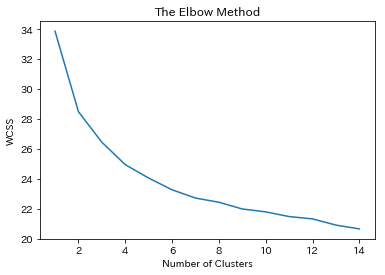

In [38]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init= "k-means++", random_state = 0)
    kmeans.fit(tokyo_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [35]:
# set number of clusters
kclusters = 5

tokyo_grouped_clustering = tokyo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tokyo_merged = df_tokyo4

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tokyo_merged = tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [36]:
tokyo_merged# check the last columns!

postalcode                         Neighborhood     state  \
108164   130-0000                 Ikanikeisaiganaibaai  Tokyo To   
108165   130-0001                           Azumabashi  Tokyo To   
108166   130-0002                             Narihira  Tokyo To   
108167   130-0003                             Yokokawa  Tokyo To   
108168   130-0004                                Honjo  Tokyo To   
108170   130-0011                             Ishiwara  Tokyo To   
108171   130-0012                               Taihei  Tokyo To   
108172   130-0013                               Kinshi  Tokyo To   
108173   130-0014                             Kamezawa  Tokyo To   
108174   130-0015                              Yokoami  Tokyo To   
108175   130-0021                               Midori  Tokyo To   
108176   130-0022                            Kotobashi  Tokyo To   
108177   130-0023                             Tatekawa  Tokyo To   
108178   130-0024                             Kikukawa  Tokyo To   
108179   130-0025                              Chitose  Tokyo To   
108180   130-0026                              Ryogoku  Tokyo To   
108181   131-0031                               Sumida  Tokyo To   
108182   131-0032                      Higashimukojima  Tokyo To   
108183   131-0033                             Mukojima  Tokyo To   
108184   131-0034                         Tsutsumidori  Tokyo To   
108185   131-0041                               Yahiro  Tokyo To   
108186   131-0042                        Higashisumida  Tokyo To   
108187   131-0043                            Tachibana  Tokyo To   
108188   131-0044                                Bunka  Tokyo To   
108189   131-0045                              Oshiage  Tokyo To   
108190   131-0046                              Kyojima  Tokyo To   
108191   166-0000                 Ikanikeisaiganaibaai  Tokyo To   
108192   166-0001                          Asagayakita  Tokyo To   
108193   166-0002                           Koenjikita  Tokyo To   
108194   166-0003                         Koenjiminami  Tokyo To   
108195   166-0004                        Asagayaminami  Tokyo To   
108196   166-0011                              Umezato  Tokyo To   
108198   166-0013                            Horinochi  Tokyo To   
108199   166-0014                            Matsunoki  Tokyo To   
108200   166-0015                        Naritahigashi  Tokyo To   
108201   166-0016                          Naritanishi  Tokyo To   
108202   167-0021                                Igusa  Tokyo To   
108203   167-0022                           Shimoigusa  Tokyo To   
108204   167-0023                            Kamiigusa  Tokyo To   
108205   167-0031                           Honamanuma  Tokyo To   
108206   167-0032                              Amanuma  Tokyo To   
108207   167-0033                              Shimizu  Tokyo To   
108208   167-0034                                Momoi  Tokyo To   
108209   167-0035                              Imagawa  Tokyo To   
108212   167-0043                              Kamiogi  Tokyo To   
108213   167-0051                              Ogikubo  Tokyo To   
108214   167-0052                        Minamiogikubo  Tokyo To   
108215   167-0053                       Nishiogiminami  Tokyo To   
108216   167-0054                                Shoan  Tokyo To   
108217   168-0061                                Omiya  Tokyo To   
108218   168-0062                                Honan  Tokyo To   
108219   168-0063                                Izumi  Tokyo To   
108220   168-0064                               Eifuku  Tokyo To   
108221   168-0065                           Hamadayama  Tokyo To   
108223   168-0072                       Takaidohigashi  Tokyo To   
108224   168-0073                         Shimotakaido  Tokyo To   
108225   168-0074                          Kamitakaido  Tokyo To   
108226   168-0081                              Miyamae  Tokyo T

In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_merged['Latitude'], tokyo_merged['Longitude'], tokyo_merged['Neighborhood'],tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if cluster == 0.0:
         ccol="red"
    elif cluster == 1.0:
         ccol="blue"
    elif cluster == 2.0:
         ccol="green"
    elif cluster == 3.0:
         ccol="yellow"
    else:
         ccol="black"
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=ccol,
        fill=True,
        fill_color=ccol,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [39]:
tokyo_0 = tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 0, tokyo_merged.columns[[1] + list(range(2, tokyo_merged.shape[1]))]]
tokyo_0.head()

Neighborhood     state    Borough  Latitude  Longitude  \
108170         Ishiwara  Tokyo To  Sumida Ku   35.7013   139.8041   
108177         Tatekawa  Tokyo To  Sumida Ku   35.6914   139.8022   
108178         Kikukawa  Tokyo To  Sumida Ku   35.6888   139.8049   
108181           Sumida  Tokyo To  Sumida Ku   35.7329   139.8209   
108182  Higashimukojima  Tokyo To  Sumida Ku   35.7222   139.8178   

        Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
108170             0.0     Convenience Store              Bus Stop   
108177             0.0     Convenience Store             BBQ Joint   
108178             0.0     Convenience Store           Supermarket   
108181             0.0     Convenience Store   Japanese Restaurant   
108182             0.0     Convenience Store              Sake Bar   

            3rd Most Common Venue   4th Most Common Venue  \
108170              Grocery Store      Chinese Restaurant   
108177         Chinese Restaurant                Sake Bar   
108178  Japanese Curry Restaurant               BBQ Joint   
108181             Discount Store  Okonomiyaki Restaurant   
108182              Grocery Store      Chinese Restaurant   

       5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
108170             BBQ Joint            Bath House                  Café   
108177   Japanese Restaurant              Bus Stop        Takoyaki Place   
108178              Sake Bar        Discount Store    Donburi Restaurant   
108181         Grocery Store        Baseball Field           Supermarket   
108182         Wagashi Place                Garden           Coffee Shop   

       8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
108170           Coffee Shop              Sake Bar            Supermarket  
108177          Climbing Gym    Donburi Restaurant   Fast Food Restaurant  
108178          Climbing Gym    Chinese Restaurant                   Park  
108181         Train Station          Intersection       Ramen Restaurant  
108182                Bakery           Video Store            Art Gallery

In [76]:
tokyo_4

Neighborhood     state        Borough  Latitude  Longitude  \
108184      Tsutsumidori  Tokyo To      Sumida Ku   35.7270   139.8115   
108186     Higashisumida  Tokyo To      Sumida Ku   35.7191   139.8317   
108198         Horinochi  Tokyo To    Suginami Ku   35.6891   139.6511   
108199         Matsunoki  Tokyo To    Suginami Ku   35.6910   139.6436   
108200     Naritahigashi  Tokyo To    Suginami Ku   35.6931   139.6372   
108201       Naritanishi  Tokyo To    Suginami Ku   35.6911   139.6294   
108207           Shimizu  Tokyo To    Suginami Ku   35.7139   139.6165   
108208             Momoi  Tokyo To    Suginami Ku   35.7130   139.6081   
108213           Ogikubo  Tokyo To    Suginami Ku   35.6982   139.6237   
108214     Minamiogikubo  Tokyo To    Suginami Ku   35.7003   139.6103   
108217             Omiya  Tokyo To    Suginami Ku   35.6847   139.6409   
108219             Izumi  Tokyo To    Suginami Ku   35.6769   139.6520   
108220            Eifuku  Tokyo To    Suginami Ku   35.6841   139.6398   
108224      Shimotakaido  Tokyo To    Suginami Ku   35.6742   139.6255   
108225       Kamitakaido  Tokyo To    Suginami Ku   35.6770   139.6099   
108288       Nishiochiai  Tokyo To    Shinjuku Ku   35.7240   139.6787   
108928            Yashio  Tokyo To   Shinagawa Ku   35.6033   139.7575   
108932        Katsushima  Tokyo To   Shinagawa Ku   35.5966   139.7443   
109081       Sakurajosui  Tokyo To    Setagaya Ku   35.6621   139.6308   
109087      Hachimanyama  Tokyo To    Setagaya Ku   35.6646   139.6174   
109094             Seijo  Tokyo To    Setagaya Ku   35.6458   139.5957   
109095            Kitami  Tokyo To    Setagaya Ku   35.6297   139.5956   
109096             Unane  Tokyo To    Setagaya Ku   35.6217   139.6037   
109097        Chitosedai  Tokyo To    Setagaya Ku   35.6531   139.6128   
109102           Okamoto  Tokyo To    Setagaya Ku   35.6253   139.6171   
109104          Fukasawa  Tokyo To    Setagaya Ku   35.6179   139.6589   
109118          Kamiyoga  Tokyo To    Setagaya Ku   35.6347   139.6278   
109119             Tokai  Tokyo To         Ota Ku   35.5857   139.7646   
109120         Jonanjima  Tokyo To         Ota Ku   35.5811   139.7781   
109121        Keihinjima  Tokyo To         Ota Ku   35.5707   139.7638   
109122         Showajima  Tokyo To         Ota Ku   35.5717   139.7500   
109123   Heiwanomorikoen  Tokyo To         Ota Ku   35.5784   139.7605   
109128       Omoriminami  Tokyo To         Ota Ku   35.5646   139.7444   
109138        Nakamagome  Tokyo To         Ota Ku   35.5956   139.7069   
109142     Higashikojiya  Tokyo To         Ota Ku   35.5568   139.7445   
109157       Nishirokugo  Tokyo To         Ota Ku   35.5488   139.7065   
109161        Kamiikedai  Tokyo To         Ota Ku   35.5961   139.6978   
109171       Nakaikegami  Tokyo To         Ota Ku   35.5852   139.6998   
109286             Nukui  Tokyo To      Nerima Ku   35.7405   139.6314   
109290    Nakamuraminami  Tokyo To      Nerima Ku   35.7283   139.6438   
109291         Miharadai  Tokyo To      Nerima Ku   35.7547   139.6019   
109303   Sekimachiminami  Tokyo To      Nerima Ku   35.7214   139.5808   
109329         Minamidai  Tokyo To      Nakano Ku   35.6826   139.6671   
109330          Maruyama  Tokyo To      Nakano Ku   35.7248   139.6534   
109333        Matsugaoka  Tokyo To      Nakano Ku   35.7206   139.6713   
110149      Megurohoncho  Tokyo To      Meguro Ku   35.6226   139.6963   
110268           Edagawa  Tokyo To        Koto Ku   35.6576   139.8065   
110270           Tatsumi  Tokyo To        Koto Ku   35.6473   139.8130   
110322            Wakasu  Tokyo To        Koto Ku   35.6254   139.8340   
110433            Kosuge  Tokyo To  Katsushika Ku   35.7535   139.8216   
110449     Nishimizumoto  Tokyo To  Katsushika Ku   35.7876   139.8499   
110490            Funado  Tokyo To    Itabashi Ku   35.7941   139.6811   
110519            Misono  Tokyo To    Itabashi Ku   35.7919   139.6401   
110716    Nishis

In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_0['Latitude'], tokyo_0['Longitude'], tokyo_0['Neighborhood'],tokyo_0['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [41]:
tokyo_1 = tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 1, tokyo_merged.columns[[1] + list(range(2, tokyo_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_1['Latitude'], tokyo_1['Longitude'], tokyo_1['Neighborhood'],tokyo_1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:
tokyo_2 = tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 2, tokyo_merged.columns[[1] + list(range(2, tokyo_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_2['Latitude'], tokyo_2['Longitude'], tokyo_2['Neighborhood'],tokyo_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [77]:
tokyo_3 = tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 3, tokyo_merged.columns[[1] + list(range(2, tokyo_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_3['Latitude'], tokyo_3['Longitude'], tokyo_3['Neighborhood'],tokyo_3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="yellow",
        fill=True,
        fill_color="yellow",
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [78]:
tokyo_4 = tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 4, tokyo_merged.columns[[1] + list(range(2, tokyo_merged.shape[1]))]]
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tokyo_4['Latitude'], tokyo_4['Longitude'], tokyo_4['Neighborhood'],tokyo_4['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="black",
        fill=True,
        fill_color="black",
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [45]:
tokyo_3.groupby('Neighborhood').count()

state  Borough  Latitude  Longitude  Cluster Labels  \
Neighborhood                                                             
Akabanenishi           1        1         1          1               1   
Asagayakita            1        1         1          1               1   
Chuo                   1        1         1          1               1   
Egota                  1        1         1          1               1   
Hayamiya               1        1         1          1               1   
Higashihorikiri        1        1         1          1               1   
Higashikamata          1        1         1          1               1   
Higashikasai           1        1         1          1               1   
Honamanuma             1        1         1          1               1   
Hosoda                 1        1         1          1               1   
Ikebukurohoncho        1        1         1          1               1   
Kamakura               1        1         1          1               1   
Kasuga                 1        1         1          1               1   
Kitakarasuyama         1        1         1          1               1   
Kitakasai              1        1         1          1               1   
Kitakojiya             1        1         1          1               1   
Kojiyahoncho           1        1         1          1               1   
Kyuden                 1        1         1          1               1   
Matsushima             1        1         1          1               1   
Minamikamata           1        1         1          1               1   
Minamimagome           1        1         1          1               1   
Minamioizumi           1        1         1          1               1   
Minamitokiwadai        1        1         1          1               1   
Motoki Nishimachi      1        1         1          1               1   
Mutsuki                1        1         1          1               1   
Nishikojiya            1        1         1          1               1   
Nishioi                1        1         1          1               1   
Nishioizumi            1        1         1          1               1   
Nishishinkoiwa         1        1         1          1               1   
Oyaguchi Kitacho       1        1         1          1               1   
Rokucho                1        1         1          1               1   
Sakuradai              1        1         1          1               1   
Shimmei                1        1         1          1               1   
Shimmeiminami          1        1         1          1               1   
Shinkamata             1        1         1          1               1   
Shishibone             1        1         1          1               1   
Shishibonecho          1        1         1          1               1   
Tachibana              1        1         1          1               1   
Tagara                 1        1         1          1               1   
Tatsunuma              1        1         1          1               1   
Tokumaru               1        1         1          1               1   
Toneri                 1        1         1          1               1   
Toshincho              1        1         1          1               1   
Towa                   1        1         1          1               1   
Wakagi                 1        1         1          1               1   

                   1st Most Common Venue  2nd Most Common Venue  \
Neighborhood                                                      
Akabanenishi                           1                      1   
Asagayakita                            1                      1   
Chuo                                   1                      1   
Egota                                  1                      1   
Hayamiya                               1                      1   
Higashihorikiri                        1                      1   
Higa

In [46]:
tokyo_0_1_d = tokyo_0['1st Most Common Venue'].value_counts().to_dict()
tokyo_0_2_d = tokyo_0['2nd Most Common Venue'].value_counts().to_dict()
tokyo_0_3_d = tokyo_0['3rd Most Common Venue'].value_counts().to_dict()
print(tokyo_0_1_d),print(tokyo_0_2_d),print(tokyo_0_3_d)

{'Convenience Store': 139, 'Intersection': 2, 'Italian Restaurant': 1, 'Restaurant': 1, 'Bar': 1}
{'Bus Stop': 18, 'Ramen Restaurant': 16, 'Intersection': 12, 'Park': 12, 'Japanese Restaurant': 10, 'Supermarket': 10, 'Grocery Store': 7, 'Convenience Store': 5, 'Chinese Restaurant': 4, 'Coffee Shop': 4, 'Noodle House': 4, 'Sake Bar': 4, 'Discount Store': 4, 'Restaurant': 3, 'BBQ Joint': 3, 'Donburi Restaurant': 3, 'Café': 2, 'Bakery': 2, 'Playground': 2, 'Clothing Store': 2, 'Drugstore': 1, 'Liquor Store': 1, 'Arcade': 1, 'Bus Station': 1, 'Metro Station': 1, 'Hardware Store': 1, 'Canal Lock': 1, 'French Restaurant': 1, 'Shopping Mall': 1, 'Gym / Fitness Center': 1, 'Tunnel': 1, 'Electronics Store': 1, 'Bath House': 1, 'Italian Restaurant': 1, 'Steakhouse': 1, 'Fast Food Restaurant': 1, 'Diner': 1}
{'Supermarket': 14, 'Japanese Restaurant': 12, 'Bus Stop': 8, 'Intersection': 7, 'Grocery Store': 7, 'Ramen Restaurant': 7, 'Park': 7, 'Discount Store': 6, 'Chinese Restaurant': 5, 'Italian R

(None, None, None)

In [47]:
tokyo_1_1_d = tokyo_1['1st Most Common Venue'].value_counts().to_dict()
tokyo_1_2_d = tokyo_1['2nd Most Common Venue'].value_counts().to_dict()
tokyo_1_3_d = tokyo_1['3rd Most Common Venue'].value_counts().to_dict()
print(tokyo_1_1_d),print(tokyo_1_2_d),print(tokyo_1_3_d)

{'Convenience Store': 224, 'Ramen Restaurant': 8, 'Japanese Restaurant': 4, 'Train Station': 3, 'Intersection': 3, 'Supermarket': 3, 'Sake Bar': 2, 'French Restaurant': 1, 'Grocery Store': 1, 'Drugstore': 1, 'Bus Station': 1, 'Chinese Restaurant': 1, 'Bus Stop': 1, 'Park': 1, 'Café': 1, 'Noodle House': 1}
{'Ramen Restaurant': 53, 'Café': 35, 'Convenience Store': 24, 'Sake Bar': 23, 'Japanese Restaurant': 18, 'Chinese Restaurant': 14, 'Grocery Store': 11, 'Coffee Shop': 10, 'Park': 9, 'Intersection': 8, 'Bus Stop': 7, 'BBQ Joint': 5, 'Italian Restaurant': 5, 'Bakery': 4, 'Supermarket': 4, 'Soba Restaurant': 3, 'Hotel': 2, 'Train Station': 2, 'Donburi Restaurant': 2, 'Sushi Restaurant': 2, 'Bus Station': 1, 'Noodle House': 1, 'Metro Station': 1, 'Asian Restaurant': 1, 'Video Store': 1, 'Coworking Space': 1, 'Concert Hall': 1, 'Dessert Shop': 1, 'Pharmacy': 1, 'Indian Restaurant': 1, 'Deli / Bodega': 1, 'Korean Restaurant': 1, 'Plaza': 1, 'Fast Food Restaurant': 1, 'Udon Restaurant': 1}
{

(None, None, None)

In [48]:
tokyo_2_1_d = tokyo_2['1st Most Common Venue'].value_counts().to_dict()
tokyo_2_2_d = tokyo_2['2nd Most Common Venue'].value_counts().to_dict()
tokyo_2_3_d = tokyo_2['3rd Most Common Venue'].value_counts().to_dict()
print(tokyo_2_1_d),print(tokyo_2_2_d),print(tokyo_2_3_d)

{'Japanese Restaurant': 33, 'Convenience Store': 22, 'Sake Bar': 21, 'Café': 17, 'Ramen Restaurant': 10, 'Italian Restaurant': 6, 'Coffee Shop': 6, 'Chinese Restaurant': 5, 'Park': 2, 'Bar': 2, 'Grocery Store': 1, 'French Restaurant': 1, 'Zoo Exhibit': 1, 'Shopping Mall': 1, 'History Museum': 1, 'Baseball Stadium': 1, 'Monjayaki Restaurant': 1, 'Hotel': 1, 'Supermarket': 1, 'Sushi Restaurant': 1, 'Indian Restaurant': 1}
{'Convenience Store': 23, 'Café': 17, 'Japanese Restaurant': 16, 'Ramen Restaurant': 15, 'Italian Restaurant': 14, 'Sake Bar': 11, 'Chinese Restaurant': 5, 'Coffee Shop': 5, 'BBQ Joint': 5, 'Japanese Curry Restaurant': 3, 'Record Shop': 2, 'Yakitori Restaurant': 2, 'Seafood Restaurant': 1, 'Unagi Restaurant': 1, 'Rock Club': 1, 'Historic Site': 1, 'Clothing Store': 1, 'Bar': 1, 'Dessert Shop': 1, 'Hotel Bar': 1, 'Scenic Lookout': 1, 'Park': 1, 'Bus Stop': 1, 'Hotel': 1, 'Bakery': 1, 'Shopping Mall': 1, 'Boutique': 1, 'Soba Restaurant': 1, 'Wine Bar': 1}
{'Japanese Resta

(None, None, None)

In [49]:
tokyo_3_1_d = tokyo_3['1st Most Common Venue'].value_counts().to_dict()
tokyo_3_2_d = tokyo_3['2nd Most Common Venue'].value_counts().to_dict()
tokyo_3_3_d = tokyo_3['3rd Most Common Venue'].value_counts().to_dict()
print(tokyo_3_1_d),print(tokyo_3_2_d),print(tokyo_3_3_d)

{'Convenience Store': 45}
{'Grocery Store': 5, 'Park': 5, 'Intersection': 4, 'Japanese Restaurant': 4, 'Supermarket': 3, 'Sushi Restaurant': 2, 'Bath House': 2, 'Bakery': 2, 'Steakhouse': 2, 'Ramen Restaurant': 2, 'Bus Stop': 2, 'Café': 1, 'Golf Driving Range': 1, 'Fishing Spot': 1, 'Japanese Curry Restaurant': 1, 'Breakfast Spot': 1, 'Drugstore': 1, 'Light Rail Station': 1, 'Deli / Bodega': 1, 'Buddhist Temple': 1, 'Farmers Market': 1, 'Italian Restaurant': 1, 'Indian Restaurant': 1}
{'Bus Stop': 4, 'Park': 4, 'Bakery': 3, 'Sushi Restaurant': 3, 'Supermarket': 3, 'Donburi Restaurant': 3, 'Grocery Store': 3, 'Intersection': 2, 'Discount Store': 2, 'Deli / Bodega': 1, 'BBQ Joint': 1, 'Yakitori Restaurant': 1, 'Music Store': 1, 'Home Service': 1, 'Bus Station': 1, 'Auto Workshop': 1, 'Diner': 1, 'Smoke Shop': 1, 'Café': 1, 'Train Station': 1, 'Pizza Place': 1, 'Kids Store': 1, 'Hot Spring': 1, 'Drugstore': 1, 'Zoo': 1, 'Spa': 1, 'Soccer Field': 1}


(None, None, None)

In [50]:
tokyo_4_1_d = tokyo_4['1st Most Common Venue'].value_counts().to_dict()
tokyo_4_2_d = tokyo_4['2nd Most Common Venue'].value_counts().to_dict()
tokyo_4_3_d = tokyo_4['3rd Most Common Venue'].value_counts().to_dict()
print(tokyo_4_1_d),print(tokyo_4_2_d),print(tokyo_4_3_d)

{'Convenience Store': 24, 'Park': 15, 'Bus Stop': 13, 'Intersection': 9, 'Italian Restaurant': 2, 'Bus Station': 1, 'Supermarket': 1, 'Platform': 1, 'Chinese Restaurant': 1, 'Ramen Restaurant': 1, 'Plaza': 1, 'Motorcycle Shop': 1}
{'Park': 19, 'Convenience Store': 17, 'Bus Stop': 11, 'Intersection': 4, 'Japanese Restaurant': 2, 'River': 2, 'Grocery Store': 2, 'Steakhouse': 1, 'Baseball Field': 1, 'Pier': 1, 'Bath House': 1, 'Restaurant': 1, 'Skate Park': 1, 'Canal Lock': 1, 'Unagi Restaurant': 1, 'Playground': 1, 'Golf Driving Range': 1, 'Noodle House': 1, 'Gym / Fitness Center': 1, 'Bakery': 1}
{'Convenience Store': 9, 'Intersection': 8, 'Park': 5, 'Bus Stop': 5, 'Japanese Restaurant': 4, 'Bakery': 4, 'Italian Restaurant': 3, 'Baseball Field': 2, 'Train Station': 2, 'Steakhouse': 2, 'Pharmacy': 2, 'Baseball Stadium': 1, 'Pier': 1, 'Bus Station': 1, 'Metro Station': 1, 'Grocery Store': 1, 'River': 1, 'Shipping Store': 1, 'Moving Target': 1, 'Photography Studio': 1, 'Soccer Field': 1, '

(None, None, None)

In [51]:
tokyo_0_1 = tokyo_0['1st Most Common Venue'].value_counts().index[0]
tokyo_0_2 = tokyo_0['2nd Most Common Venue'].value_counts().index[0]
tokyo_0_3 = tokyo_0['3rd Most Common Venue'].value_counts().index[0]
tokyo_0_1,tokyo_0_2,tokyo_0_3

('Convenience Store', 'Bus Stop', 'Supermarket')

In [52]:
tokyo_1_1 = tokyo_1['1st Most Common Venue'].value_counts().index[0]
tokyo_1_2 = tokyo_1['2nd Most Common Venue'].value_counts().index[0]
tokyo_1_3 = tokyo_1['3rd Most Common Venue'].value_counts().index[0]
tokyo_1_1,tokyo_1_2,tokyo_1_3

('Convenience Store', 'Ramen Restaurant', 'Sake Bar')

In [53]:
tokyo_2_1 = tokyo_2['1st Most Common Venue'].value_counts().index[0]
tokyo_2_2 = tokyo_2['2nd Most Common Venue'].value_counts().index[0]
tokyo_2_3 = tokyo_2['3rd Most Common Venue'].value_counts().index[0]
tokyo_2_1,tokyo_2_2,tokyo_2_3

('Japanese Restaurant', 'Convenience Store', 'Japanese Restaurant')

In [54]:
tokyo_3_1 = tokyo_3['1st Most Common Venue'].value_counts().index[0]
tokyo_3_2 = tokyo_3['2nd Most Common Venue'].value_counts().index[0]
tokyo_3_3 = tokyo_3['3rd Most Common Venue'].value_counts().index[0]
tokyo_3_1,tokyo_3_2,tokyo_3_3

('Convenience Store', 'Grocery Store', 'Bus Stop')

In [55]:
tokyo_4_1 = tokyo_4['1st Most Common Venue'].value_counts().index[0]
tokyo_4_2 = tokyo_4['2nd Most Common Venue'].value_counts().index[0]
tokyo_4_3 = tokyo_4['3rd Most Common Venue'].value_counts().index[0]
tokyo_4_1,tokyo_4_2,tokyo_4_3

('Convenience Store', 'Park', 'Convenience Store')

In [56]:
cols = ['1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue']
tokyo_index_0 = pd.DataFrame(index=[], columns=cols)
tokyo_index_0 = tokyo_index_0.append(pd.Series([tokyo_0_1,tokyo_0_2,tokyo_0_3], index=tokyo_index_0.columns), ignore_index=True)
tokyo_index_0 = tokyo_index_0.append(pd.Series([tokyo_1_1,tokyo_1_2,tokyo_1_3], index=tokyo_index_0.columns), ignore_index=True)
tokyo_index_0 = tokyo_index_0.append(pd.Series([tokyo_2_1,tokyo_2_2,tokyo_2_3], index=tokyo_index_0.columns), ignore_index=True)
tokyo_index_0 = tokyo_index_0.append(pd.Series([tokyo_3_1,tokyo_3_2,tokyo_3_3], index=tokyo_index_0.columns), ignore_index=True)
tokyo_index_0 = tokyo_index_0.append(pd.Series([tokyo_4_1,tokyo_4_2,tokyo_4_3], index=tokyo_index_0.columns), ignore_index=True)
tokyo_index_0

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue
0     Convenience Store              Bus Stop           Supermarket
1     Convenience Store      Ramen Restaurant              Sake Bar
2   Japanese Restaurant     Convenience Store   Japanese Restaurant
3     Convenience Store         Grocery Store              Bus Stop
4     Convenience Store                  Park     Convenience Store

In [69]:
tokyo_0_12 = tokyo_0['1st Most Common Venue'].value_counts().index[1]
tokyo_0_22 = tokyo_0['2nd Most Common Venue'].value_counts().index[1]
tokyo_0_32 = tokyo_0['3rd Most Common Venue'].value_counts().index[1]
tokyo_1_12 = tokyo_1['1st Most Common Venue'].value_counts().index[1]
tokyo_1_22 = tokyo_1['2nd Most Common Venue'].value_counts().index[1]
tokyo_1_32 = tokyo_1['3rd Most Common Venue'].value_counts().index[1]
tokyo_2_12 = tokyo_2['1st Most Common Venue'].value_counts().index[1]
tokyo_2_22 = tokyo_2['2nd Most Common Venue'].value_counts().index[1]
tokyo_2_32 = tokyo_2['3rd Most Common Venue'].value_counts().index[1]
#tokyo_3_12 = tokyo_3['1st Most Common Venue'].value_counts().index[0]
tokyo_3_12 = "-"
tokyo_3_22 = tokyo_3['2nd Most Common Venue'].value_counts().index[1]
tokyo_3_32 = tokyo_3['3rd Most Common Venue'].value_counts().index[1]
tokyo_4_12 = tokyo_4['1st Most Common Venue'].value_counts().index[1]
tokyo_4_22 = tokyo_4['2nd Most Common Venue'].value_counts().index[1]
tokyo_4_32 = tokyo_4['3rd Most Common Venue'].value_counts().index[1]

In [70]:
cols = ['1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue']
tokyo_index_1 = pd.DataFrame(index=[], columns=cols)
tokyo_index_1 = tokyo_index_1.append(pd.Series([tokyo_0_12,tokyo_0_22,tokyo_0_32], index=tokyo_index_1.columns), ignore_index=True)
tokyo_index_1 = tokyo_index_1.append(pd.Series([tokyo_1_12,tokyo_1_22,tokyo_1_32], index=tokyo_index_1.columns), ignore_index=True)
tokyo_index_1 = tokyo_index_1.append(pd.Series([tokyo_2_12,tokyo_2_22,tokyo_2_32], index=tokyo_index_1.columns), ignore_index=True)
tokyo_index_1 = tokyo_index_1.append(pd.Series([tokyo_3_12,tokyo_3_22,tokyo_3_32], index=tokyo_index_1.columns), ignore_index=True)
tokyo_index_1 = tokyo_index_1.append(pd.Series([tokyo_4_12,tokyo_4_22,tokyo_4_32], index=tokyo_index_1.columns), ignore_index=True)
tokyo_index_1

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue
0          Intersection      Ramen Restaurant   Japanese Restaurant
1      Ramen Restaurant                  Café      Ramen Restaurant
2     Convenience Store                  Café              Sake Bar
3                     -                  Park                  Park
4                  Park     Convenience Store          Intersection